In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./DiwaliSalesData.csv', encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.drop(columns=['Status', 'unnamed1'], inplace=True)

In [5]:
df.shape

(11251, 13)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount']=df['Amount'].astype('int')

In [13]:
df.drop(columns=['User_ID', 'Cust_name', 'Product_ID', 'Age'], inplace=True)

In [14]:
df.head()

,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912
4,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            11239 non-null  object
 1   Age Group         11239 non-null  object
 2   Marital_Status    11239 non-null  int64 
 3   State             11239 non-null  object
 4   Zone              11239 non-null  object
 5   Occupation        11239 non-null  object
 6   Product_Category  11239 non-null  object
 7   Orders            11239 non-null  int64 
 8   Amount            11239 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 878.0+ KB


In [16]:
df['Gender'].replace({'F': 0, 'M': 1}, inplace=True)

In [17]:
df.head()

,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,0,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,0,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,0,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1,0-17,0,Karnataka,Southern,Construction,Auto,2,23912
4,1,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877


### EDA

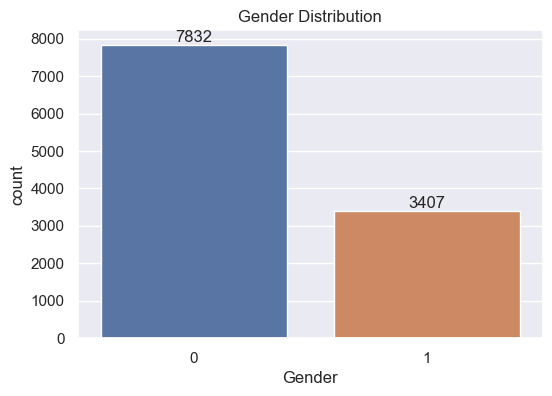

In [37]:
sns.set(rc={'figure.figsize': (6, 4)})
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution")
plt.show()

### Most number of buyers were females

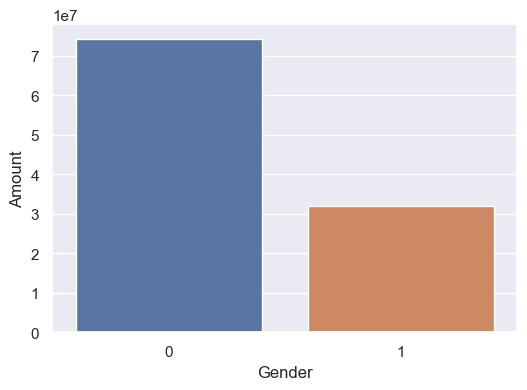

In [38]:
amount_by_gender=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns
sns.barplot(x='Gender', y='Amount', data=amount_by_gender)
plt.show()

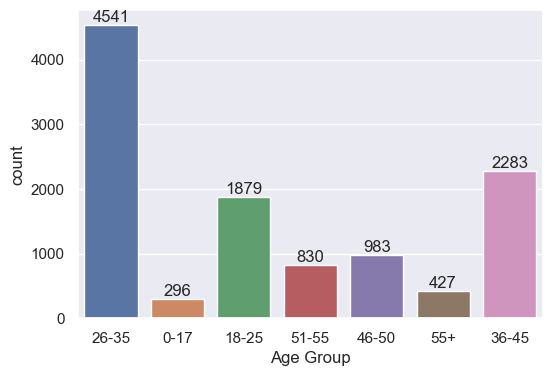

In [39]:
ax=sns.countplot(x='Age Group', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

### The age category 26-35 had the most number of buyers

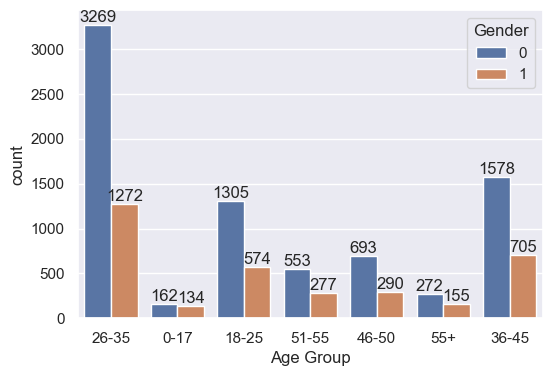

In [40]:
ax=sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

### Out of the most number of buyers in 26-35 age category, most of the buyers were female

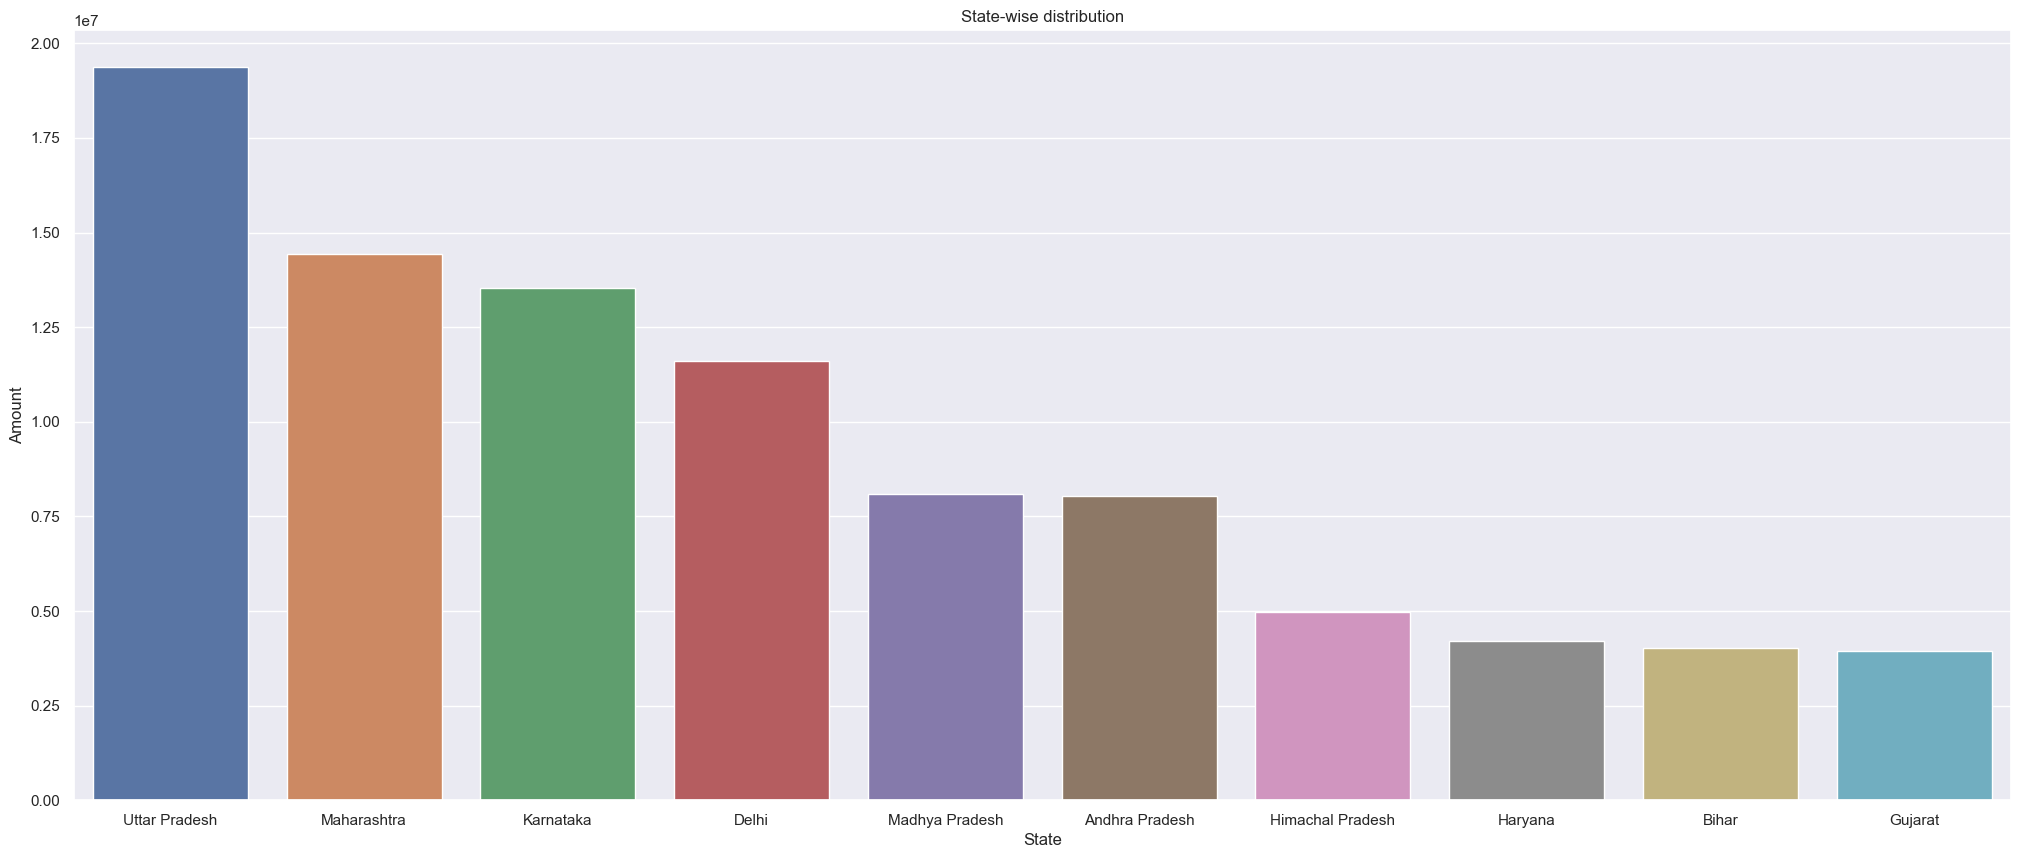

In [73]:
amount_by_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (25, 10)})
sns.barplot(x='State', y='Amount', data=amount_by_state)
plt.title("State-wise distribution")
plt.show()

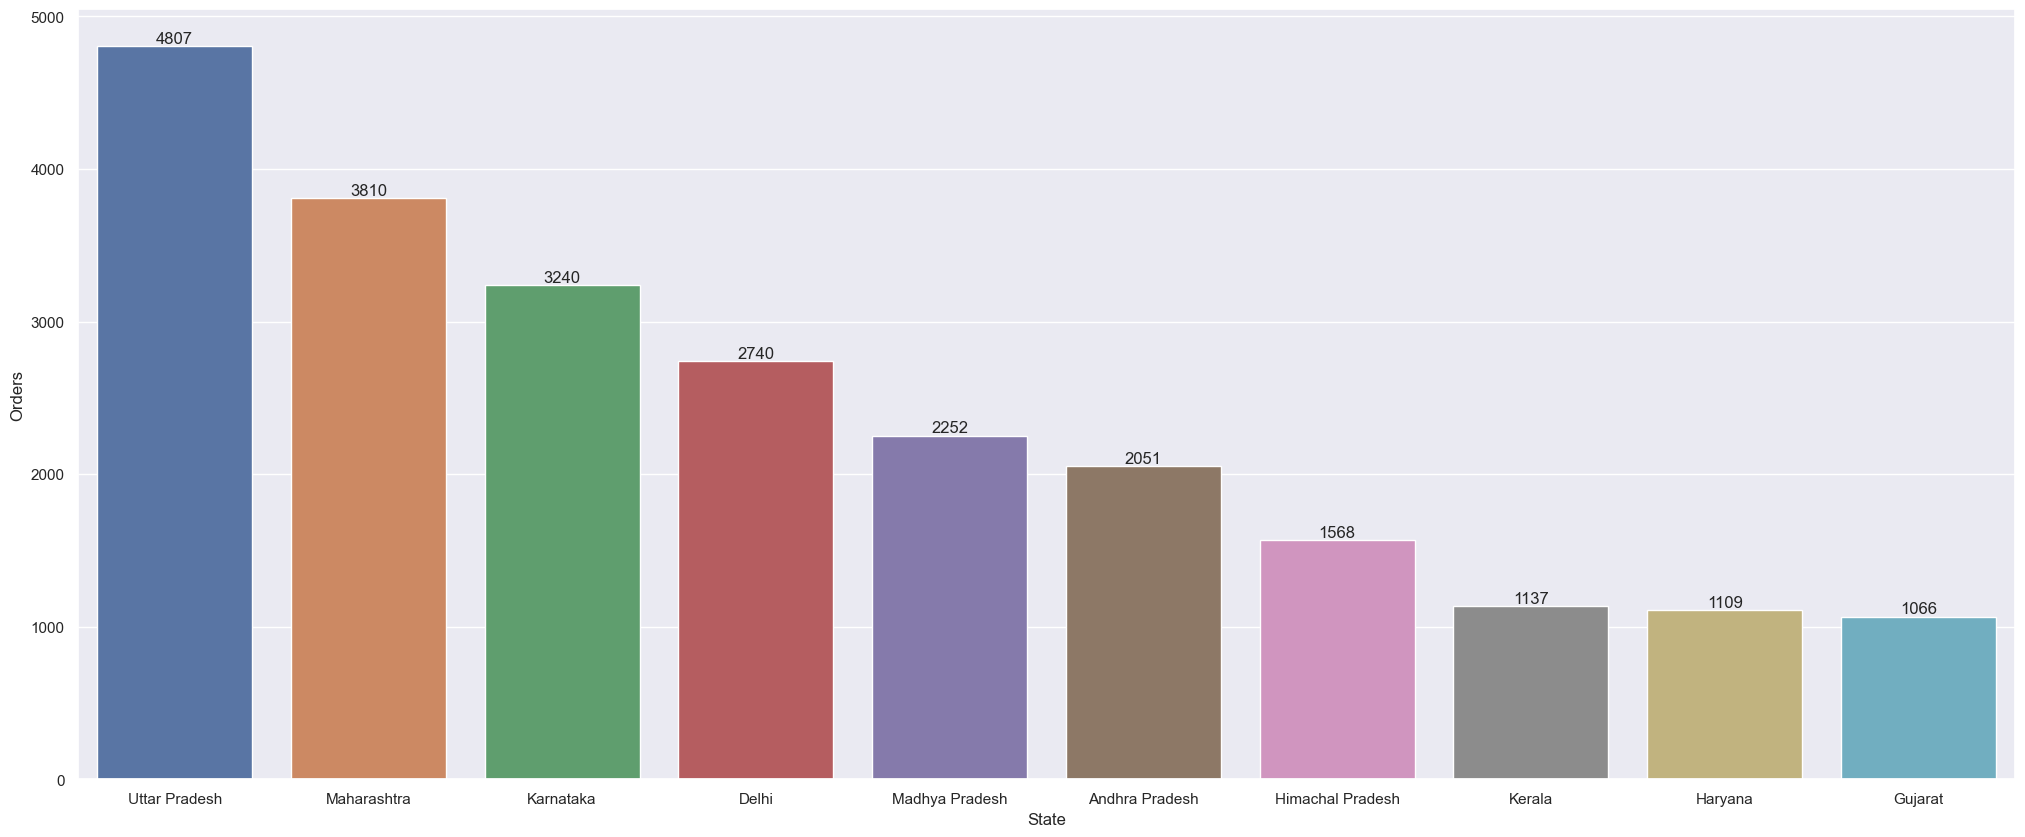

In [42]:
orders_by_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (25, 10)})
ax=sns.barplot(x='State', y='Orders', data=orders_by_state)
for bars in ax.containers:
    ax.bar_label(bars)

### Uttar Pradesh had most number of buyers with maximum amount

/var/folders/yd/_4rnltyx4nv04y4l8nf8nckr0000gn/T/ipykernel_12297/3556677271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_by_product_category=df.groupby(['Product_Category'], as_index=False).sum().sort_values(by='Orders', ascending=False).head(10)


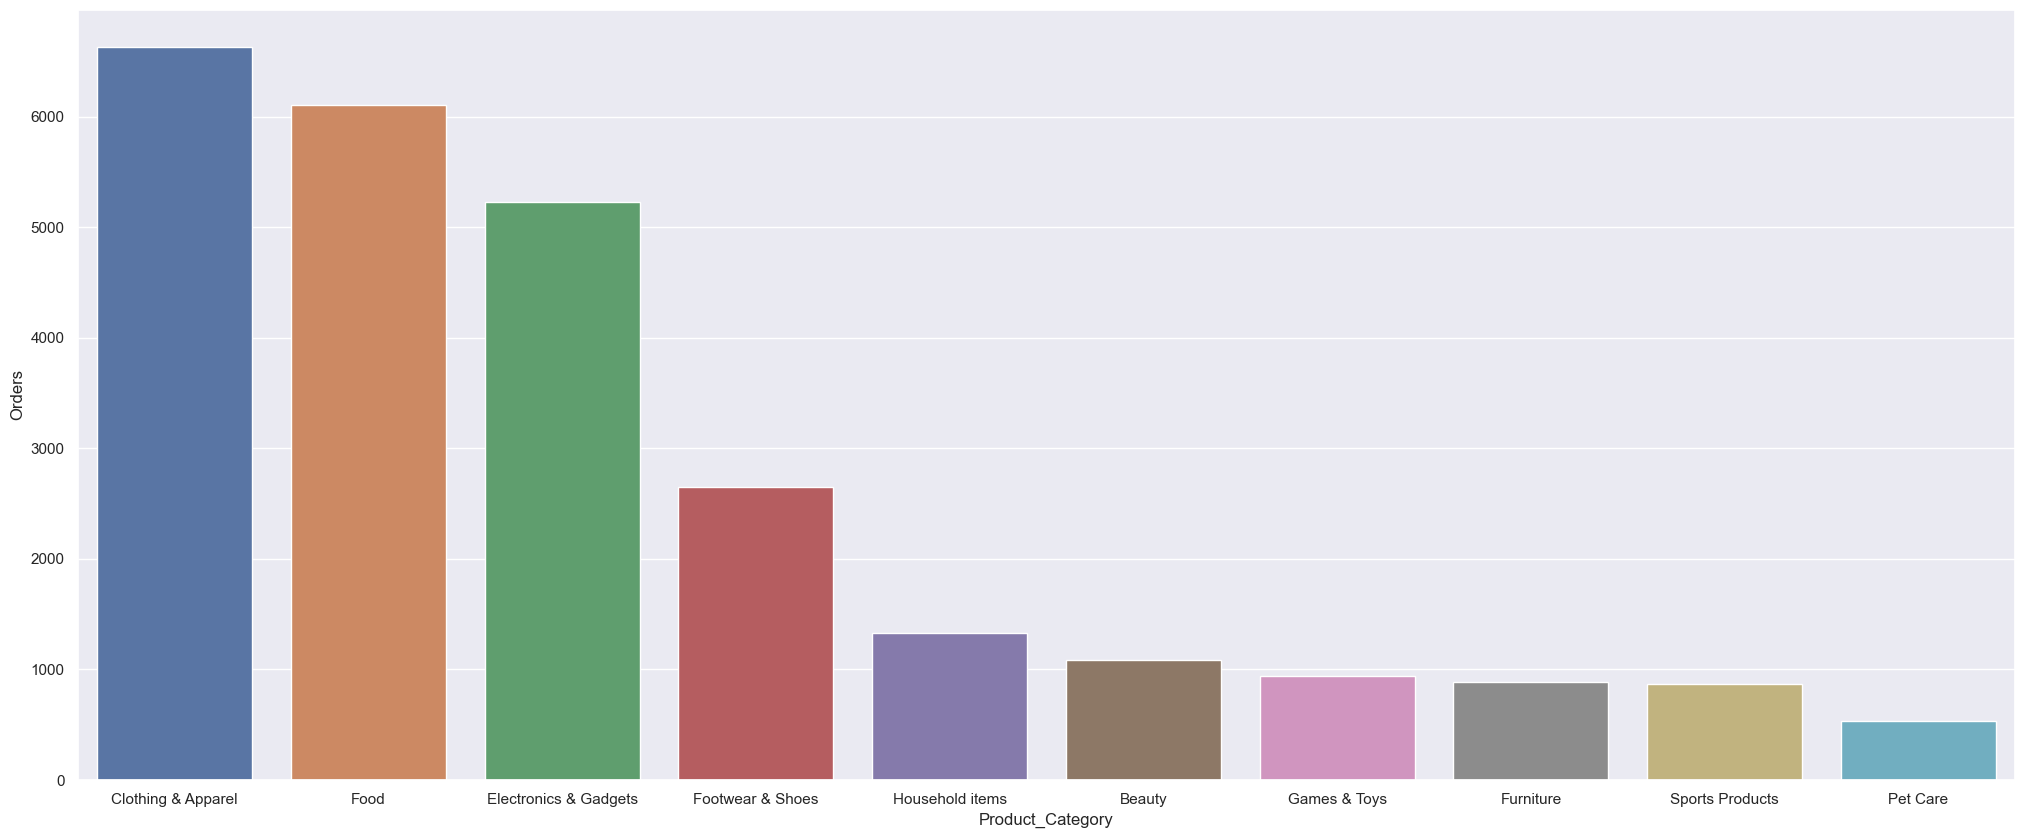

In [45]:
orders_by_product_category=df.groupby(['Product_Category'], as_index=False).sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Orders', data=orders_by_product_category)
plt.show()

### The clothing and apparel got the most number of orders

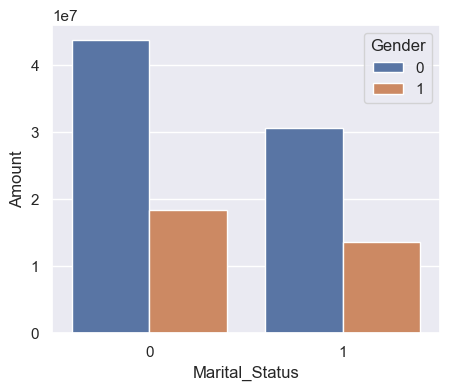

In [50]:
sales_data=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (5, 4)})
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_data)
plt.show()

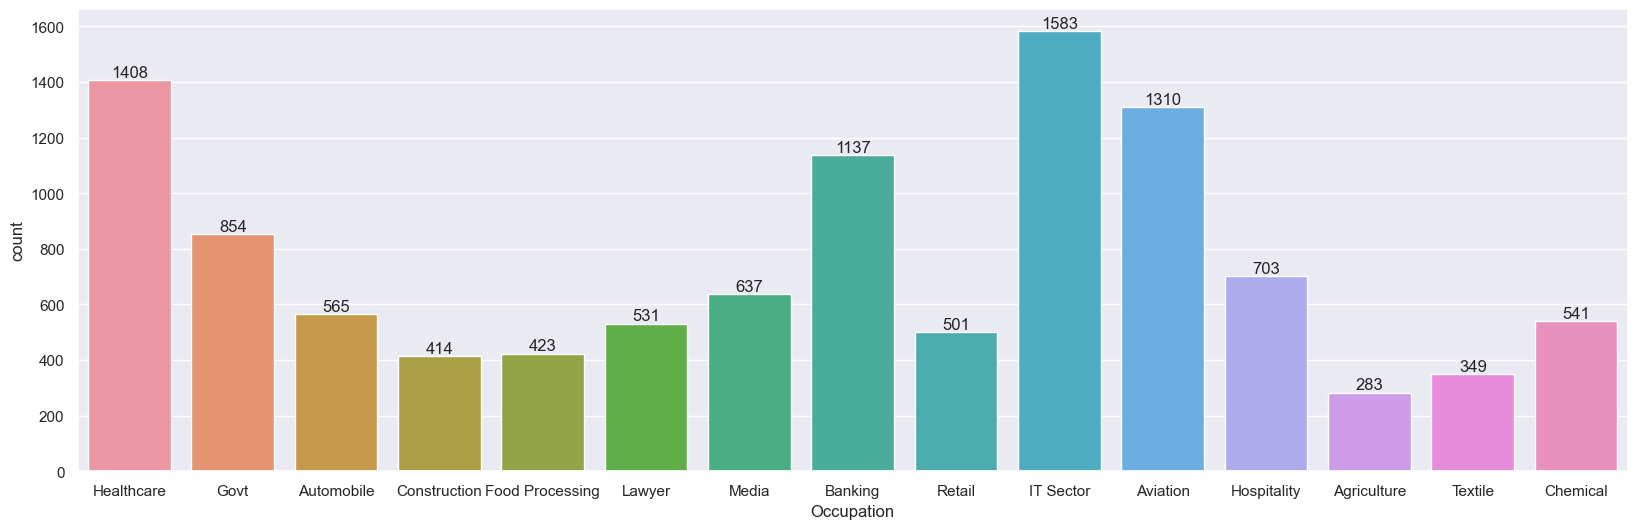

In [71]:
sns.set(rc={'figure.figsize': (20, 6)})
ax=sns.countplot(x='Occupation', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Conclusion

### Married women in the age group of 26-35 from U.P, Maharashtra, and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category